#Contexto

Los datos han sido extraídos del sitio web Anime Planet, el cual es un sitio enfocado en la animación japonesa que contiene una gran colección de series animadas, las cuales pueden ser añadidas por los usuarios a listas que estos pueden crear para llevar un registro de todas sus series.

Cuando los usuarios añaden una serie a su lista, estos pueden colocarla en diferentes categorías dependiendo de si ya la han visto, quieren verla, la están viendo, o la estaban viendo pero la abandonaron antes de finalizarla.

El sitio también permite que los usuarios puedan votar para darle un puntaje a las series utilizando una escala de 5 estrellas.

Por último, cabe señalar que en este trabajo, al utilizar el término serie, este también puede incluir películas u otro tipo de producciones animadas, pero en favor de la simplicidad, todas estas serán referidas mediante este término.


#Contenido de los datos del excel

Cada fila de los datos corresponde a una serie animada y en las columnas están registrados los datos propios de la serie, como su título o el año de emisión, y también información relacionada con la interacción de los usuarios con esta, como el puntaje o la cantidad de usuarios que la han visto.

También es importante señalar que todos estos datos fueron extraídos el 15 de junio del 2020, por lo cual no están considerados todos los cambios posteriores a esa fecha, como las series emitidas en los años siguientes y las de la otra mitad del mismo año 2020.

#Comprension de los datos

**Explicación de las columnas**

**Title**: Corresponde al título de la serie animada.

**mediaType**: Corresponde al tipo de medio al que pertenece la serie y puede tomar los valores: TV, TV Special, DVD Special, Other, Movie, Web, music video y OVA, donde este último corresponde a las siglas de "Original Video Animation", y en el caso de Other, se usa para clasificar a cualquier serie que no entre en las categorías anteriores.

**eps**: Corresponde a la cantidad de episodios que tiene la serie.

**duration**: Corresponde a la duración estimada en minutos de cada episodio de la serie.

**ongoing**: Su valor de true o false indica si la serie se encuentra o no en emisión.

**startYr**: Muestra el año en que la serie entró en emisión.

**finisYr**: Muestra el año en que finalizó la emisión de la serie.

**szOfRelease**: Indica la estación del año en el hemisferio norte en que empezó a emitirse la serie y puede tomar los valores: Spring, Fall, Winter y Summer.

**description**: Corresponde a un texto que describe de qué se trata la serie.

**studios**: Corresponde a los nombres de los estudios de animación detrás del desarrollo de la serie.

**tags**: Muestra las categorías a las que corresponde la serie según su contenido, considerando solo contenido apropiado para todo público.

**contentWarn**: Muestra las categorías a las que corresponde la serie según su contenido, considerando solo contenido que no es apropiado para todo público.

**watched**: Corresponde a la cantidad de usuarios que han marcado que han visto todos los episodios de la serie.

**watching**: Corresponde a la cantidad de usuarios que han marcado que se encuentran viendo la serie.

**wantWatch**: Corresponde a la cantidad de usuarios que han marcado que tienen interés en ver la serie en el futuro.

**dropped**: Corresponde a la cantidad de usuarios que han marcado que han visto al menos un capítulo de la serie pero la han abandonado antes de finalizarla.

**rating**: Corresponde al puntaje que tiene la serie en base a los votos de los usuarios y usa una escala de 5, pudiendo tomar valores decimales.

**votes**: Corresponde a la cantidad de usuarios que han votado para darle un puntaje a la serie.

In [1]:
#Importo las libreras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Cargo el archivo con los datos
datos=pd.read_csv("anime.csv", index_col=0, encoding="utf-8")

In [3]:
#Primero observo los datos para tener una vision general de como estan conformados
datos.head(10)

,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
title,,,,,,,,,,,,,,,,,
Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
Haikyuu!! Karasuno High School vs Shiratorizawa Academy,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0
Demon Slayer: Kimetsu no Yaiba,TV,26.0,NaN,False,2019.0,2019.0,Spring,"Bloodthirsty demons lurk in the woods, and nob...",['ufotable'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",['Violence'],28708.0,10844,13156,600,4.647,24765.0
Haikyuu!! Second Season,TV,25.0,NaN,False,2015.0,2016.0,Fall,"After losing to Aoba Johsai at the Inter-High,...",['Production I.G'],"['Shounen', 'Sports', 'School Club', 'School L...",[],31329.0,3861,8664,264,4.639,22819.0
Hunter x Hunter (2011),TV,148.0,NaN,False,2011.0,2014.0,Fall,"Drawn to the mystique of the unknown, Hunters ...",['MADHOUSE'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'S...",['Violence'],50195.0,17730,19219,2132,4.635,46853.0
Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Movie,1.0,111.0,False,2013.0,2013.0,NaN,"While watching a movie, Gintoki comes upon a ""...",['Sunrise'],"['Action', 'Comedy', 'Drama', 'Sci Fi', 'Shoun...",[],8454.0,280,6624,150,4.625,6254.0


**Entender la distribución de los datos con gráficos**

Se procederá a graficar algunos de los datos para entender cómo se encuentran distribuidos.


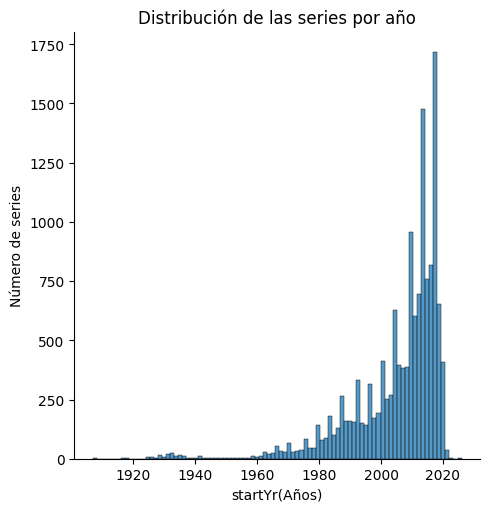

In [4]:
sns.displot(datos["startYr"])
plt.title("Distribución de las series por año")
plt.xlabel("startYr(Años)")
plt.ylabel("Número de series")
plt.show()

Este gráfico muestra cómo se distribuyen las series según el año en el que salieron en emisión y se puede ver cómo la mayoría se concentra en los años más recientes.

Cabe destacar que el año 2020 tiene un valor más bajo, lo cual es explicable por el hecho de que la fuente de datos fue extraída a mitad de 2020.

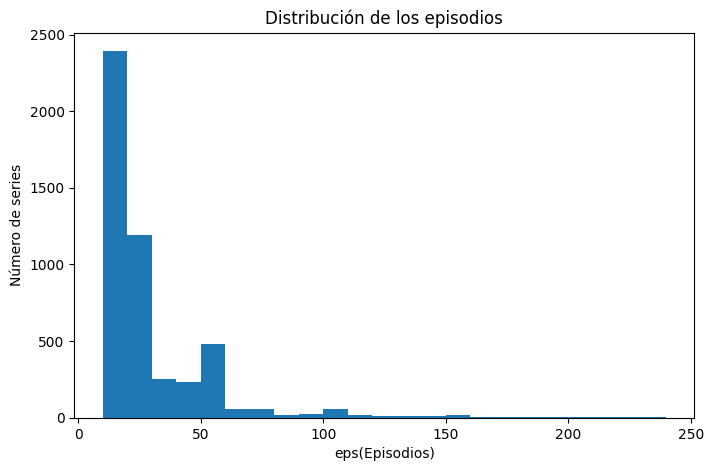

In [5]:
bins=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240]
plt.figure(figsize=(8, 5))
plt.hist(datos.eps,bins=bins)
plt.title("Distribución de los episodios")
plt.xlabel("eps(Episodios)")
plt.ylabel("Número de series")
plt.show()

Este gráfico muestra cómo se distribuye el número de episodios en las series y se observa cómo estos tienden a concentrarse a la izquierda.

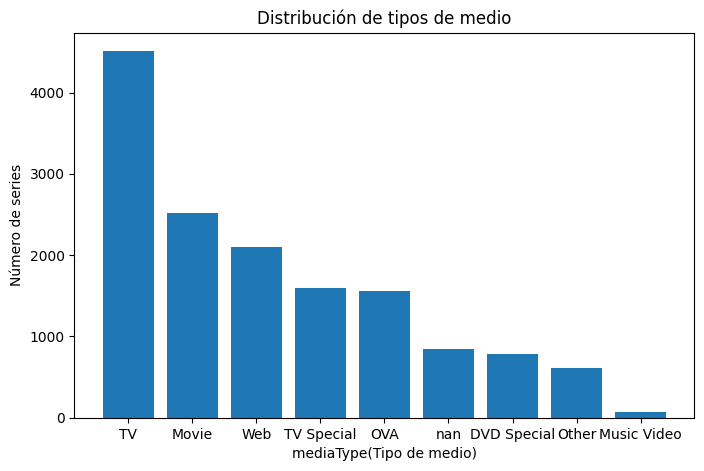

In [6]:
plt.figure(figsize=(8, 5))
mediaType = datos["mediaType"].astype(str)
plt.bar(mediaType.unique(), mediaType.value_counts())
plt.title("Distribución de tipos de medio")
plt.xlabel("mediaType(Tipo de medio)")
plt.ylabel("Número de series")
plt.show()

Aquí se muestra la distribución de los tipos de medio, observándose que el medio más común es el TV y el menos común es Music Video.

Cabe destacar que hay valores NaN.

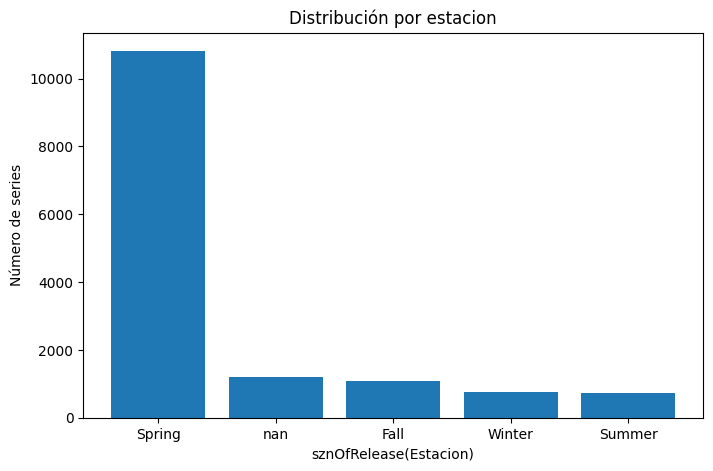

In [7]:
plt.figure(figsize=(8, 5))
szn_of_release = datos["sznOfRelease"].astype(str)
plt.bar(szn_of_release.unique(), szn_of_release.value_counts())
plt.title("Distribución por estacion")
plt.xlabel("sznOfRelease(Estacion)")
plt.ylabel("Número de series")
plt.show()

Aquí se muestra la distribución según la estación en que fue emitida la serie y se puede ver cómo la mayor parte se concentra en la primavera (Spring).

Cabe destacar que hay valores NaN.

([<matplotlib.patches.Wedge at 0x7e5a04c76170>,
 [Text(1.0987523554460605, 0.05237615298715627, 'True(En Emision)'),
  Text(-1.0987523511552237, -0.052376243000698285, 'False(lNo en emision)')],
 [Text(0.599319466606942, 0.02856881072026705, '1.5%'),
  Text(-0.5993194642664855, -0.0285688598185627, '98.5%')])

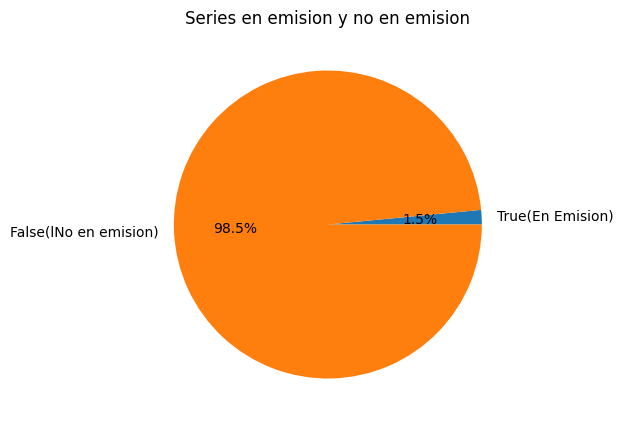

In [8]:
ongoing1 = datos.loc[datos["ongoing"]==True].count()[0]
ongoing2 = datos.loc[datos["ongoing"]==False].count()[0]

plt.figure(figsize=(8,5))
plt.title("Series en emision y no en emision")
labels=["True(En Emision)","False(lNo en emision)"]
plt.pie([ongoing1,ongoing2],labels=labels, autopct='%1.1f%%')

En este gráfico se comparan las series en emisión y las que no están en emisión, y se puede observar cómo las series en emisión son muy pocas en comparación con las que no están en emisión.

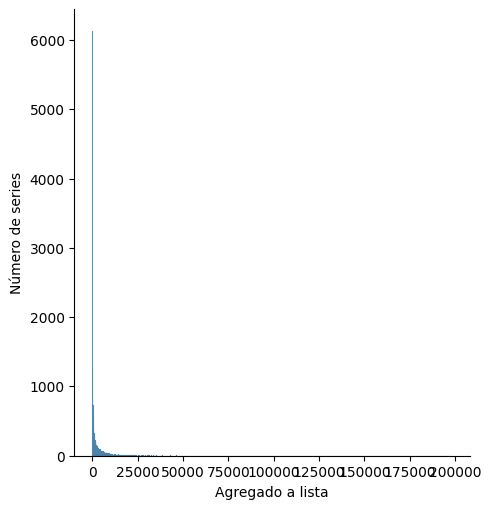

In [9]:
sns.displot(datos["watched"]+datos["watching"]+datos["wantWatch"]+datos["dropped"])
plt.xlabel("Agregado a lista")
plt.ylabel("Número de series")
plt.show()

En el siguiente gráfico se muestra cómo se distribuyen las series según los usuarios que las tienen agregadas a su lista.

Se puede ver que existen algunas series que poseen una enorme cantidad de usuarios, mientras que la mayoría se concentra en los valores más bajos.

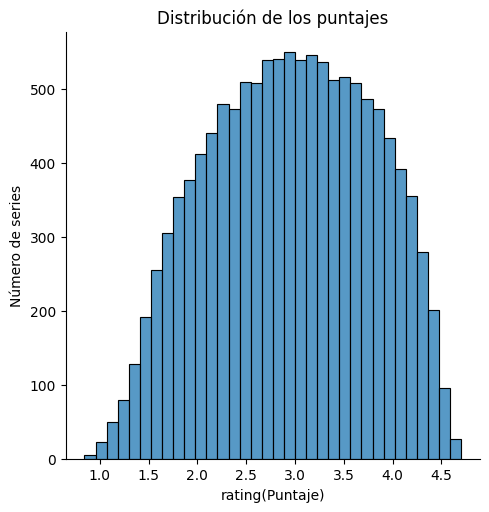

In [10]:
sns.displot(datos["rating"])
plt.title("Distribución de los puntajes")
plt.xlabel("rating(Puntaje)")
plt.ylabel("Número de series")
plt.show()

Aquí se muestra cómo se distribuyen los puntajes de las series.

([<matplotlib.patches.Wedge at 0x7e5a04445c90>,
 [Text(1.0932476651075307, 0.12169446469306823, '1 Estrellas'),
  Text(0.48460804913062494, 0.9874993866923716, '2 Estrellas'),
  Text(-1.0965207018753498, -0.08742053739705914, '3 Estrellas'),
  Text(0.6403269981151986, -0.8944167571578581, '4 Estrellas'),
  Text(1.0996479221959294, -0.02782889164474995, '5 Estrellas')],
 [Text(0.5963169082404712, 0.06637879892349176, '3.5%'),
  Text(0.264331663162159, 0.5386360291049299, '28.4%'),
  Text(-0.598102201022918, -0.04768392948930498, '38.6%'),
  Text(0.34926927169919914, -0.48786368572246797, '28.6%'),
  Text(0.599807957561416, -0.015179395442590879, '0.8%')])

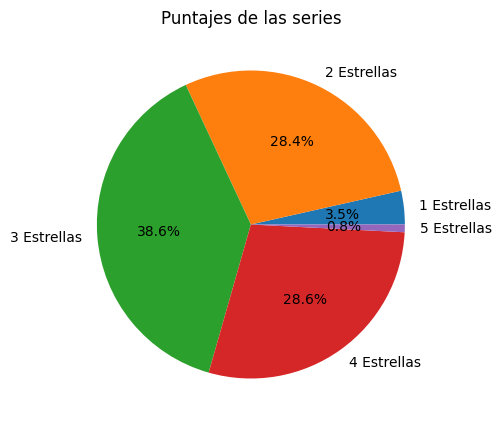

In [11]:
rating1 = datos.loc[datos["rating"].round()==1].count()[0]
rating2 = datos.loc[datos["rating"].round()==2].count()[0]
rating3 = datos.loc[datos["rating"].round()==3].count()[0]
rating4 = datos.loc[datos["rating"].round()==4].count()[0]
rating5 = datos.loc[datos["rating"].round()==5].count()[0]

plt.figure(figsize=(8,5))
plt.title("Puntajes de las series")
labels=["1 Estrellas","2 Estrellas","3 Estrellas","4 Estrellas","5 Estrellas"]
plt.pie([rating1,rating2,rating3,rating4,rating5],labels=labels, autopct='%1.1f%%')

En este gráfico se ve cómo se comparan los puntajes tomando su valor redondeado con valores de 1 a 5, y se ve cómo el valor más alto y el más bajo son los menos comunes.

#Preparación y Limpieza de los Datos

Columna Ongoing

In [12]:
#Me aseguro que todos los valores de la columna Ongoing corresponde a True o False para lo cual veo sus valores unicos
datos["ongoing"].unique()

array([False,  True])

Columna startYr

In [13]:
#Veo la cantidad de valores numericos y no numericos y su proporcion para confirmar que todos sean numericos y ver que no hayan errores
cantidadNan =  datos.startYr.isna().sum()
cantidadNumero = datos.startYr.count()

print("Cantidad de valores numericos:",cantidadNumero)
print("Cantidad de valores NaN:",cantidadNan)
print("Porcentaje de valores numericos",cantidadNumero/datos.shape[0]*100)

Cantidad de valores numericos: 14356
Cantidad de valores NaN: 222
Porcentaje de valores numericos 98.47715736040608


In [14]:
#Veo cual es el promedio de los datos para decidir si utilizarlo como reemplazo para los valores NaN
datos.startYr.mean()

2005.4577876845917

In [15]:
#Toma la decision de llenar los valores NaN con el valor del promedio
datos.startYr = datos.startYr.fillna(datos.startYr.mean())

In [16]:
#convierto todos los valores a entero para mantener todos los datos en el tipo que le corresponde
datos["startYr"] = datos["startYr"].astype(int)

Columna eps

In [17]:
#Veo la cantidad de valores numericos y no numericos y su proporcion para confirmar que todos sean numericos y ver que no hayan errores
cantidadNan =  datos.eps.isna().sum()
cantidadNumero = datos.eps.count()

print("Cantidad de valores numericos:",cantidadNumero)
print("Cantidad de valores NaN:",cantidadNan)
print("Porcentaje de valores numericos",cantidadNumero/datos.shape[0]*100)

Cantidad de valores numericos: 14219
Cantidad de valores NaN: 359
Porcentaje de valores numericos 97.53738510083689


In [18]:
#Veo cual es el promedio de los datos para decidir si utilizarlo como reemplazo para los valores NaN
datos.eps.mean()

13.50123074759125

In [19]:
#Toma la decision de llenar los valores NaN con el valor del promedio
datos.eps = datos.eps.fillna(datos.eps.mean())


In [20]:
#convierto todos los valores a entero para mantener todos los datos en el tipo que le corresponde
datos["eps"] = datos["eps"].astype(int)

Columna watched

In [21]:
#Veo la cantidad de valores numericos y no numericos y su proporcion para confirmar que todos sean numericos y ver que no hayan errores
cantidadNan =  datos.watched.isna().sum()
cantidadNumero = datos.watched.count()

print("Cantidad de valores numericos:",cantidadNumero)
print("Cantidad de valores NaN:",cantidadNan)
print("Porcentaje de valores numericos",cantidadNumero/datos.shape[0]*100)

Cantidad de valores numericos: 14356
Cantidad de valores NaN: 222
Porcentaje de valores numericos 98.47715736040608


In [22]:
#Veo cual es el promedio de los datos para decidir si utilizarlo como reemplazo para los valores NaN
datos.watched.mean()

2408.0433964892727

In [23]:
#Toma la decision de llenar los valores NaN con el valor del promedio

datos.watched = datos.watched.fillna(datos.watched.mean())

In [24]:
#convierto todos los valores a entero para mantener todos los datos en el tipo que le corresponde
datos["watched"] = datos["watched"].astype(int)

Columna wantWatch

In [25]:
#Veo la cantidad de valores numericos y no numericos y su proporcion para confirmar que todos sean numericos y ver que no hayan errores
cantidadNan =  datos.wantWatch.isna().sum()
cantidadNumero = datos.wantWatch.count()

print("Cantidad de valores numericos:",cantidadNumero)
print("Cantidad de valores NaN:",cantidadNan)
print("Porcentaje de valores numericos",cantidadNumero/datos.shape[0]*100)

Cantidad de valores numericos: 14578
Cantidad de valores NaN: 0
Porcentaje de valores numericos 100.0


Columna dropped

In [26]:
#Veo la cantidad de valores numericos y no numericos y su proporcion para confirmar que todos sean numericos y ver que no hayan errores
cantidadNan =  datos.dropped.isna().sum()
cantidadNumero = datos.dropped.count()

print("Cantidad de valores numericos:",cantidadNumero)
print("Cantidad de valores NaN:",cantidadNan)
print("Porcentaje de valores numericos",cantidadNumero/datos.shape[0]*100)

Cantidad de valores numericos: 14578
Cantidad de valores NaN: 0
Porcentaje de valores numericos 100.0


columna rating

In [27]:
#Veo la cantidad de valores numericos y no numericos y su proporcion para confirmar que todos sean numericos y ver que no hayan errores
cantidadNan =  datos.rating.isna().sum()
cantidadNumero = datos.rating.count()

print("Cantidad de valores numericos:",cantidadNumero)
print("Cantidad de valores NaN:",cantidadNan)
print("Porcentaje de valores numericos",cantidadNumero/datos.shape[0]*100)

Cantidad de valores numericos: 12107
Cantidad de valores NaN: 2471
Porcentaje de valores numericos 83.04980107010563


In [28]:
#Dado que una importante cantidad de datos de esta columna tienen valores NaN decido ver como cambian los resultados si los NaN se reemplazan por el promedio o la mediana

#Veo como cambia al reemplazar por el promedio
datosCopia = datos.copy()
datosCopia.rating = datosCopia.rating.fillna(datosCopia.rating.mean())
print("Datos originales\n",datos.rating.describe())
print("Datos nuevos\n",datosCopia.rating.describe())


Datos originales
 count    12107.000000
mean         2.948697
std          0.827642
min          0.844000
25%          2.303500
50%          2.965000
75%          3.615500
max          4.702000
Name: rating, dtype: float64
Datos nuevos
 count    14578.000000
mean         2.948697
std          0.754238
min          0.844000
25%          2.451000
50%          2.948697
75%          3.479000
max          4.702000
Name: rating, dtype: float64


In [29]:
#Veo como cambia al reemplazar por la mediana
datosCopia = datos.copy()
datosCopia.rating = datosCopia.rating.fillna(datosCopia.rating.median())
print("Datos originales\n",datos.rating.describe())
print("Datos nuevos\n",datosCopia.rating.describe())

Datos originales
 count    12107.000000
mean         2.948697
std          0.827642
min          0.844000
25%          2.303500
50%          2.965000
75%          3.615500
max          4.702000
Name: rating, dtype: float64
Datos nuevos
 count    14578.000000
mean         2.951460
std          0.754263
min          0.844000
25%          2.451000
50%          2.965000
75%          3.479000
max          4.702000
Name: rating, dtype: float64


In [30]:
#Considerando el efecto que tiene para ambos casos en la desviacion estandar y los cuartiles, y considerando que se trata del puntaje y que con las
#preguntas planteadas quiero poder lograr resultados muy precisios decido no tomar el riesgo y eliminar los valores NaN
datos = datos.dropna(subset=["rating"])

Columna sznOfRelease

In [31]:
#Veo los valores que sznOfRelease puede tomar para ver si hay o no errores
#Se puede observar que hay valores NaN
datos['sznOfRelease'].unique()

array(['Spring', nan, 'Fall', 'Winter', 'Summer'], dtype=object)

In [32]:
#A los valores NaN le agrego "Desconocido"
datos['sznOfRelease'].fillna("Desconocido", inplace=True)

<ipython-input-32-9ddad37a0a7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['sznOfRelease'].fillna("Desconocido", inplace=True)


Columna MediaType

In [33]:
#Veo los valores que mediaType puede tomar para ver si hay o no errores
#Se puede observar que hay valores NaN
datos['mediaType'].unique()

array(['TV', 'Movie', 'Web', 'TV Special', 'OVA', nan, 'DVD Special',
       'Other', 'Music Video'], dtype=object)

In [34]:
#A los valores NaN le agrego "Desconocido"
datos['mediaType'].fillna("Desconocido", inplace=True)

<ipython-input-34-b53988aebad5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['mediaType'].fillna("Desconocido", inplace=True)


**Crear nuevas columnas**

Ahora procedo a crear nuevas columnas según sea necesario.

Creación de la Columna addedList

In [35]:
#Creo una nueva columna a la cual llamo addedList(Agregado a la lista) la cual representa la cantidad de personas que tiene la serie agregada a su lista, es decir corresponde a la suma de los valores de watching,wantWatch,watched y dropped
#Cabe recordar que estos valores que se estan sumando son mutuamente excluyentes, es decir un usuario no puede tener una serie en mas de un estado a la vez
datos["addedList"] = datos["watching"]+datos["wantWatch"]+datos["watched"]+datos["dropped"]

<ipython-input-35-487320b91e08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["addedList"] = datos["watching"]+datos["wantWatch"]+datos["watched"]+datos["dropped"]


Creación de la Columna hasContentWarn

In [36]:
#Creo la columna hasContentWarn en donde se indicara por medio de un valor True o False si la serie tiene o no contenido apropiado para todo el publico
#True significa que el contenido no es apropiado para todo publico y False que si es apropiado
#Para hacer esto dado que la columna contentWarn lista todos los contenidos no apropiados de la forma ["contenido1","contenido2"] verifico cuales no estan vacios, es decir que no son []
#Y dependiendo de si estan o no vacios le asigno True o False a los valores de la nueva columna
def verificarNoApto(string):
    return string != "[]"

datos['hasContentWarn'] = datos['contentWarn'].apply(verificarNoApto)

<ipython-input-36-0e8f8ec44fed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['hasContentWarn'] = datos['contentWarn'].apply(verificarNoApto)


In [37]:
#Veo los valores que puede tomar hasContentWarn para ver si todos son True o False y asi verificar que no haya errores
#Se puede observar que hay valores NaN
datos['hasContentWarn'].unique()

array([ True, False])

([<matplotlib.patches.Wedge at 0x7e5a01fae9b0>,
 [Text(1.0286151615166286, 0.3898087345072204, 'True(No apto para todo publico)'),
  Text(-1.0286151523924962, -0.38980875858369585, 'False(Apto para todo publico)')],
 [Text(0.5610628153727064, 0.21262294609484747, '11.5%'),
  Text(-0.5610628103959069, -0.21262295922747043, '88.5%')])

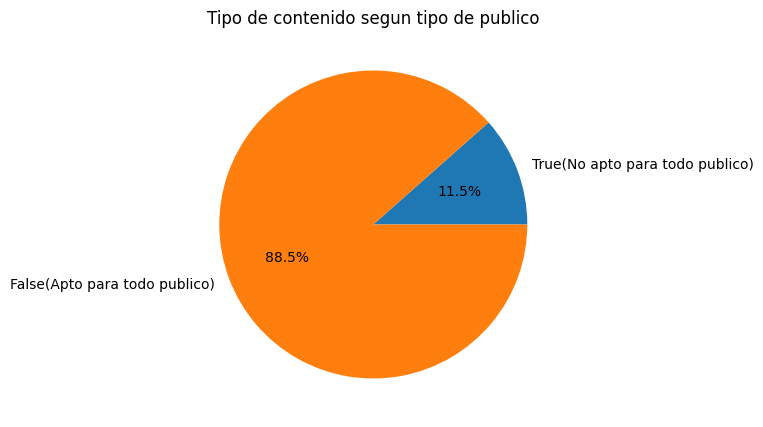

In [38]:
#Procedo a ver graficamente como se comparan los valores de True y False en la columna recien creada y se observa que la mayoria pertenece a la categoria de apto para todo publico
hasContentWarn1 = datos.loc[datos["hasContentWarn"].round()==True].count()[0]
hasContentWarn2 = datos.loc[datos["hasContentWarn"].round()==False].count()[0]

plt.figure(figsize=(8,5))
plt.title("Tipo de contenido segun tipo de publico")
labels=["True(No apto para todo publico)","False(Apto para todo publico)"]
plt.pie([hasContentWarn1,hasContentWarn2],labels=labels, autopct='%1.1f%%')

**Discretizar Datos**

Transformo las columnas de texto a números según corresponda.

Columna sznOfRelease

In [39]:
#Reemplazo cada valor por un valor numerico
datos.sznOfRelease = datos.sznOfRelease.str.replace("Spring","0")
datos.sznOfRelease = datos.sznOfRelease.str.replace("Fall","1")
datos.sznOfRelease = datos.sznOfRelease.str.replace("Winter","2")
datos.sznOfRelease = datos.sznOfRelease.str.replace("Summer","3")
datos.sznOfRelease = datos.sznOfRelease.str.replace("Desconocido","4")

In [40]:
#Veo los valores que sznOfRelease puede tomar para ver que todos se hayan reemplazado correctamente
datos['sznOfRelease'].unique()

array(['0', '4', '1', '2', '3'], dtype=object)

In [41]:
#convierto todos los valores a entero para mantener todos los datos en el tipo que le corresponde
datos["sznOfRelease"] = datos["sznOfRelease"].astype(int)

Columna mediaType

In [42]:
#Reemplazo cada valor por un valor numerico
datos.mediaType = datos.mediaType.str.replace("TV Special","0")
datos.mediaType = datos.mediaType.str.replace("Movie","1")
datos.mediaType = datos.mediaType.str.replace("Web","2")
datos.mediaType = datos.mediaType.str.replace("OVA","3")
datos.mediaType = datos.mediaType.str.replace("DVD Special","4")
datos.mediaType = datos.mediaType.str.replace("Other","5")
datos.mediaType = datos.mediaType.str.replace("Music Video","6")
datos.mediaType = datos.mediaType.str.replace("TV","7")
datos.mediaType = datos.mediaType.str.replace("Desconocido","8")


In [43]:
#Veo los valores que mediaType puede tomar para ver que todos se hayan reemplazado correctamente
datos['mediaType'].unique()

array(['7', '1', '2', '0', '3', '8', '4', '5', '6'], dtype=object)

In [44]:
#convierto todos los valores a entero para mantener todos los datos en el tipo que le corresponde
datos["mediaType"] = datos["mediaType"].astype(int)

**Normalizar y reducir dimensionalidad**

In [45]:
#Se eliminan todas las columnas que carecen de informacion relevante para responder a las preguntas planteadas y las que ya no son necesarias
datos = datos.drop("description",axis=1)
datos = datos.drop("studios",axis=1)
datos = datos.drop("duration",axis=1)
datos = datos.drop("tags",axis=1)
datos = datos.drop("contentWarn",axis=1)
datos = datos.drop("finishYr",axis=1)
datos = datos.drop("watched",axis=1)
datos = datos.drop("wantWatch",axis=1)
datos = datos.drop("dropped",axis=1)
datos = datos.drop("votes",axis=1)
datos = datos.drop("watching",axis=1)

In [46]:
#Aqui se observa como han quedado los datos tras las transformaciones realizadas y la creacion y eliminacion de columnas
datos.head(10)

,mediaType,eps,ongoing,startYr,sznOfRelease,rating,addedList,hasContentWarn
title,,,,,,,,
Fullmetal Alchemist: Brotherhood,7,64,False,2009,0,4.702,146524,True
your name.,1,1,False,2016,4,4.663,82141,False
A Silent Voice,1,1,False,2016,4,4.661,64118,True
Haikyuu!! Karasuno High School vs Shiratorizawa Academy,7,10,False,2016,1,4.660,35566,False
Attack on Titan 3rd Season: Part II,7,10,False,2019,0,4.650,32563,True
Demon Slayer: Kimetsu no Yaiba,7,26,False,2019,0,4.647,53308,True
Haikyuu!! Second Season,7,25,False,2015,1,4.639,44118,False
Hunter x Hunter (2011),7,148,False,2011,1,4.635,89276,True
Gintama Kanketsu-hen: Yorozuya yo Eien Nare,1,1,False,2013,4,4.625,15508,False


In [47]:
#normalizo con respecto a la media algunas de las columnas como se exige para este trabajo
def mean_norm(df_input, columna):
    columna = df_input[columna]
    return (columna - columna.mean()) / columna.std()

#Decido guardar los datos normalizados en un dataframe distinto para poder continuar haciendo uso de los valores no normalizados segun lo requiera
datosNormalizados = datos.copy()
datosNormalizados["eps"] = mean_norm(datosNormalizados, "eps")
datosNormalizados["rating"] = mean_norm(datosNormalizados, "rating")
datosNormalizados["addedList"] = mean_norm(datosNormalizados, "addedList")

#Modelado

**Descubrir outliers**

Columna startYr

In [48]:
#Veo cuales son los outliers de el año de emision(startYr) y se puede ver que los valores de outliers muestran años de varias decadas atras
q1=datos["startYr"].quantile(0.25)
q3=datos["startYr"].quantile(0.75)
IQR=q3-q1

limiteInferior=q1-1.5*IQR
limiteSuperior=q3+1.5*IQR
outliers=datos[(datos["startYr"] < limiteInferior) | (datos["startYr"]>limiteSuperior)]
outliers["startYr"].describe()

count     622.000000
mean     1962.747588
std        17.122998
min      1907.000000
25%      1958.000000
50%      1969.000000
75%      1975.750000
max      1979.000000
Name: startYr, dtype: float64

In [49]:
#Elimino los outliers para que no impacten en el analisis de los resultados puesto que puede haber cambios significativos entre las series actuales y las mas antiguas impidiendo reflejar la realidad actual de estas
datos = datos.drop(outliers.index)

In [50]:
#Veo cuales son los outliers de los episodios(eps)
q1=datos["eps"].quantile(0.25)
q3=datos["eps"].quantile(0.75)
IQR=q3-q1

limiteInferior=q1-1.5*IQR
limiteSuperior=q3+1.5*IQR
outliers=datos[(datos["eps"] < limiteInferior) | (datos["eps"]>limiteSuperior)]
outliers["eps"].describe()

count     980.000000
mean       79.969388
std       145.322385
min        29.000000
25%        43.000000
50%        51.000000
75%        56.000000
max      1888.000000
Name: eps, dtype: float64

In [51]:
#Elimino los outliers para que las series con una cantidad inusual de episodios no se tomen en consideracion ya que podrian impactar en los resultados
datos = datos.drop(outliers.index)

In [52]:
#Veo cuales son los outliers de addedList
q1=datos["addedList"].quantile(0.25)
q3=datos["addedList"].quantile(0.75)
IQR=q3-q1

limiteInferior=q1-1.5*IQR
limiteSuperior=q3+1.5*IQR
outliers=datos[(datos["addedList"] < limiteInferior) | (datos["addedList"]>limiteSuperior)]
outliers["addedList"].describe()

count      1260.000000
mean      25868.253968
std       18474.309821
min       10510.000000
25%       13959.750000
50%       19418.500000
75%       30009.500000
max      151721.000000
Name: addedList, dtype: float64

In [53]:
#Elimino los outliers para que no impacten el eanalisis de los resultados las series que tengan una cantidad insual de usuarios
datos = datos.drop(outliers.index)

**Analisis**

In [54]:
datos.describe()

,mediaType,eps,startYr,sznOfRelease,rating,addedList
count,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000
mean,3.926230,5.304273,2008.489778,3.382910,2.839696,1762.522445
std,2.330254,7.008580,9.684811,1.241348,0.789106,2433.778160
min,0.000000,1.000000,1980.000000,0.000000,0.844000,0.000000
25%,2.000000,1.000000,2004.000000,4.000000,2.229000,107.000000
50%,3.000000,1.000000,2012.000000,4.000000,2.851000,592.000000
75%,6.000000,10.000000,2016.000000,4.000000,3.459000,2499.000000
max,8.000000,28.000000,2020.000000,4.000000,4.604000,10498.000000


Aquí se pueden ver los valores del promedio, desviación estándar, mínimo, máximo y los cuartiles para todos los datos numéricos.

Se pueden destacar distintos resultados, como el hecho de que las series, en promedio, tienen 5 capítulos, lo cual tiene sentido porque muchas series de anime podrían corresponder a capítulos especiales o películas, por lo que no tienen un gran número de episodios.

Columna rating

In [55]:
#Veo los valores de los cuartiles y se puede observar que el 25% de los puntajes(rating) estan igual o inferior a 2.229, la mitad esta igual o inferior a 2.851
#y el 75% igual o inferior a 3.459
q1 = datos["rating"].quantile(0.25)
q2 = datos["rating"].quantile(0.5)
q3 = datos["rating"].quantile(0.75)
print("Primer cuartil:",q1)
print("Segundo cuartil:",q2)
print("Tercer cuartil:",q3)

Primer cuartil: 2.229
Segundo cuartil: 2.851
Tercer cuartil: 3.459


In [56]:
#Veo la asimetria la cual muestra un valor muy bajo pero negativo por lo cual los valores tienden a concentrarse mas a la derecha
print("\nAsimetria:",datos["rating"].skew())


Asimetria: -0.049831990991748135


<Axes: title={'center': 'Distribucion del puntaje'}, xlabel='rating(Puntaje)', ylabel='Series'>

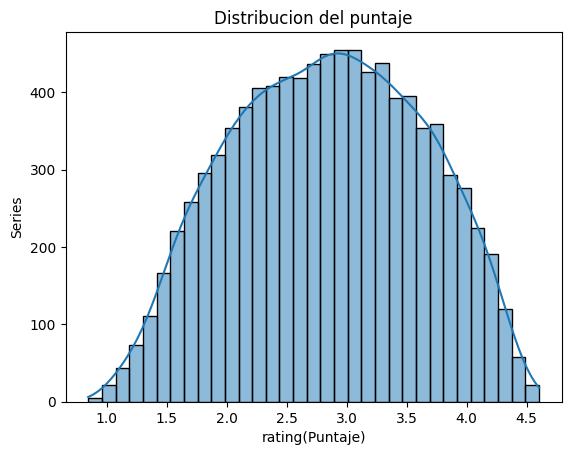

In [57]:
#Procedo a graficar y se puede observar que la distribucion a simple vista pareciera ser casi simetrica
fig,axs=plt.subplots()
plt.title("Distribucion del puntaje")
plt.xlabel("rating(Puntaje)")
plt.ylabel("Series")
sns.histplot(datos["rating"],kde=True)

Columna addedList

In [58]:
#Veo los valores de los cuartiles y como se puede observar el 25% de las series tiene un valor de agregado a la lista igual o inferior a 107, la mitad igual o inferior a 592
#y el 75% igual o inferior a 2499
q1 = datos["addedList"].quantile(0.25)
q2 = datos["addedList"].quantile(0.5)
q3 = datos["addedList"].quantile(0.75)
print("Primer cuartil:",q1)
print("Segundo cuartil:",q2)
print("Tercer cuartil:",q3)

Primer cuartil: 107.0
Segundo cuartil: 592.0
Tercer cuartil: 2499.0


In [59]:
#Veo la asimetria la cual muestra un valor positivo lo cual significa que los valores se concentran mas hacia la izquierda de la distribucion
print("\nAsimetria:",datos["addedList"].skew())


Asimetria: 1.7325549854924227


<Axes: xlabel='Agregado a lista', ylabel='Series'>

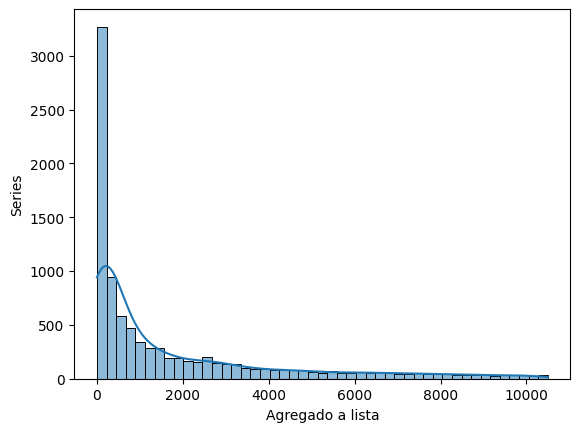

In [60]:
fig,axs=plt.subplots()
plt.xlabel("Agregado a lista")
plt.ylabel("Series")
sns.histplot(datos["addedList"],kde=True)

Aquí se puede observar cómo la distribución muestra una asimetría positiva y cómo el 75% de las series se concentran en los valores por debajo del 2499, como se vio anteriormente, siendo en comparación pocas las series que logran alcanzar un gran número de usuarios que las agreguen a su lista.

Columna eps

In [61]:
#Veo los valores de los cuartiles y como se observar que el 50% de los episodios(episodes) estan igual o inferior a 1 y el 75% igual o inferior a 2499
#Cabe destacar que el valor del primer y segundo cuartil es el mismo
q1 = datos["eps"].quantile(0.25)
q2 = datos["eps"].quantile(0.5)
q3 = datos["eps"].quantile(0.75)
print("Primer cuartil:",q1)
print("Segundo cuartil:",q2)
print("Tercer cuartil:",q3)

Primer cuartil: 1.0
Segundo cuartil: 1.0
Tercer cuartil: 10.0


In [62]:
##Veo la asimetria la cual muestra un valor positivo lo cual significa que los valores se concentran mas hacia la izquierda de la distribucion
print("\nAsimetria:",datos["eps"].skew())


Asimetria: 1.6987689166913058


<Axes: xlabel='Episodios', ylabel='Series'>

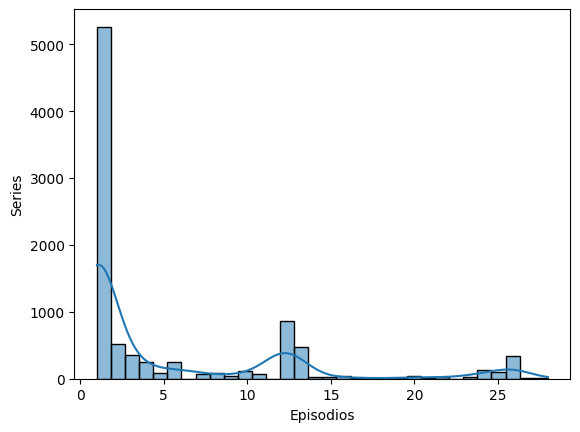

In [63]:
fig,axs=plt.subplots()
plt.xlabel("Episodios")
plt.ylabel("Series")
sns.histplot(datos["eps"],kde=True)

Se puede observar que la mayor parte de los valores se concentran a la izquierda, pero hay variaciones que forman picos y valles, lo cual significa que las series parecen mostrar una tendencia a seguir ciertos intervalos particulares en cuanto a los episodios que pueden tener.

Columna startYr

In [64]:
#Veo que un 25% de las series tienen un año de emision igual o inferior al 2004, la mitad tiene igual o inferior al 2012 y el 75% igual o inferior al 2016
q1 = datos["startYr"].quantile(0.25)
q2 = datos["startYr"].quantile(0.5)
q3 = datos["startYr"].quantile(0.75)
print("Primer cuartil:",q1)
print("Segundo cuartil:",q2)
print("Tercer cuartil:",q3)

Primer cuartil: 2004.0
Segundo cuartil: 2012.0
Tercer cuartil: 2016.0


In [65]:
##Veo la asimetria la cual muestra un valor negativo lo cual significa que los valores se concentran mas hacia la derecha de la distribucion
print("\nAsimetria:",datos["startYr"].skew())


Asimetria: -1.0989012850390478


<Axes: xlabel='Año de emision', ylabel='Series'>

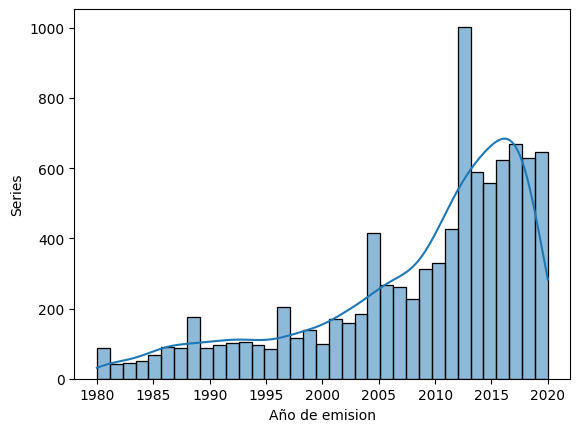

In [66]:
fig,axs=plt.subplots()
plt.xlabel("Año de emision")
plt.ylabel("Series")
sns.histplot(datos["startYr"],kde=True)

Se puede observar que la mayor parte de las series se concentran hacia la derecha, lo cual indica que, a medida que ha pasado el tiempo, ha ido aumentando el número de series en emisión, lo cual confirma que la producción de series de anime ha estado aumentando a lo largo del tiempo.

Cabe señalar que en el último año se muestra una baja en el número de series, pero eso se puede explicar por el hecho de que la fuente de los datos está limitada hasta el 15 de junio del 2020, por lo que los datos del último año están incompletos.

Columnas rating y hasContentWarn

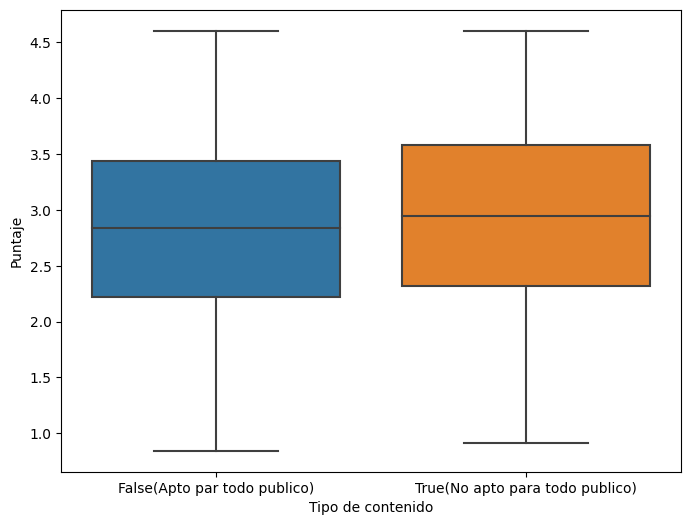

In [67]:
labels = ["False(Apto par todo publico)", "True(No apto para todo publico)"]
order = [0,1]

plt.figure(figsize=(8, 6))
sns.boxplot(x="hasContentWarn",y="rating",data=datos, order=order)
plt.ylabel("Puntaje")
plt.xlabel("Tipo de contenido")
plt.xticks(range(len(labels)), labels)
plt.show()

Aquí se puede observar la relación que hay entre el contenido, según si es o no apto para todo público, y el puntaje, y se puede ver que el contenido no apto para todo público tiende a tener un puntaje ligeramente superior, ya que sus cuartiles, máximos y mínimos tienen un valor más alto.

Columnas rating y sznOfRelease

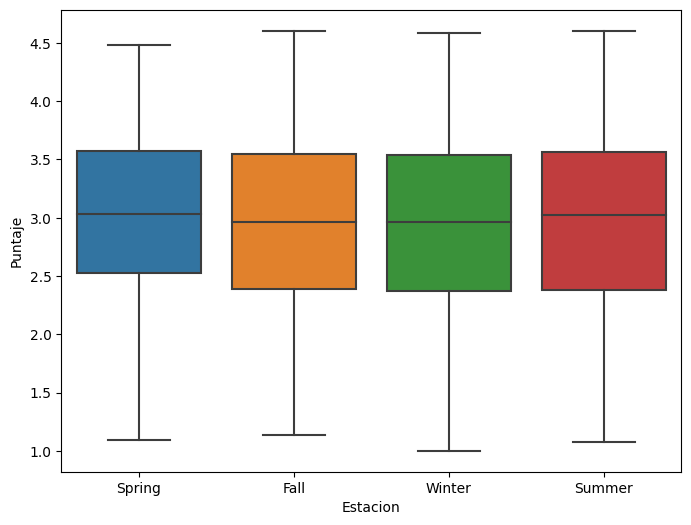

In [68]:
labels = ["Spring", "Fall", "Winter", "Summer"]
order = [0,1,2,3]

plt.figure(figsize=(8, 6))
sns.boxplot(x="sznOfRelease",y="rating",data=datos, order=order)
plt.ylabel("Puntaje")
plt.xlabel("Estacion")
plt.xticks(range(len(labels)), labels)
plt.show()

Aquí se busca observar si existe alguna relación entre la estación en la cual es emitida una serie y su puntaje, y se puede observar ligeras diferencias entre sus mínimos, máximos y sus cuartiles.

Columnas rating y mediaType

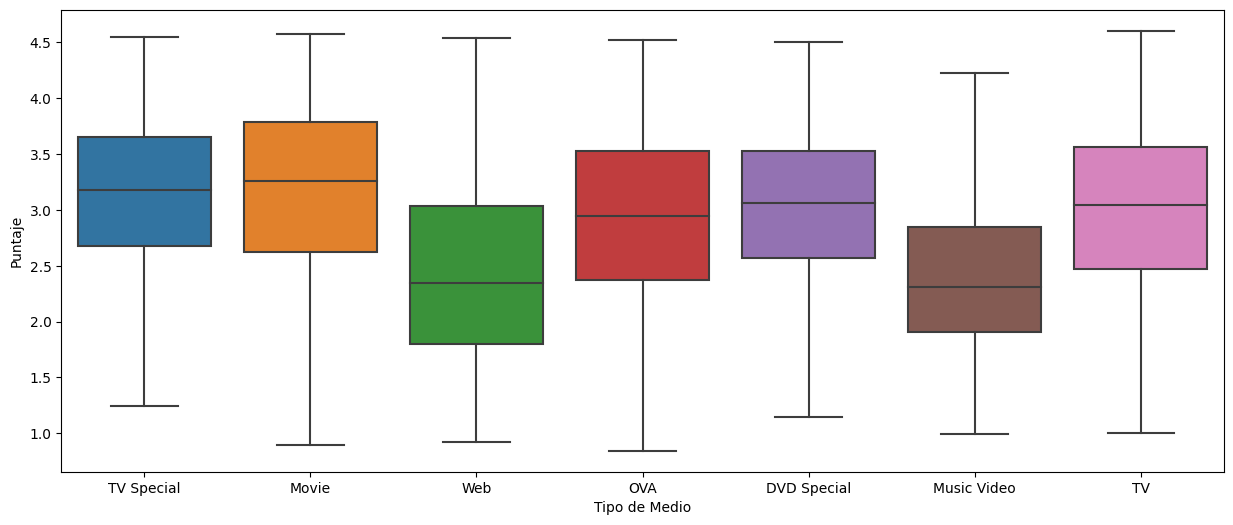

In [69]:
labels = ["TV Special", "Movie", "Web", "OVA","DVD Special","Music Video","TV"]
order = [0,1,2,3,4,6,7]

plt.figure(figsize=(15, 6))
sns.boxplot(x="mediaType",y="rating",data=datos, order=order)
plt.ylabel("Puntaje")
plt.xlabel("Tipo de Medio")
plt.xticks(range(len(labels)), labels)
plt.show()

Aquí se busca ver si hay una relación entre el puntaje y el tipo de medio en el que se emite una serie, donde se puede observar que TV, DVD Special, OVA, Movie y TV Special muestran un mayor puntaje en contraste con otras series como Web y Music Video.

Para este gráfico se ha omitido la categoría Other y Desconocido, ya que la primera no muestra una categoría concreta y la última es para valores desconocidos, por lo que no se tomará en cuenta.

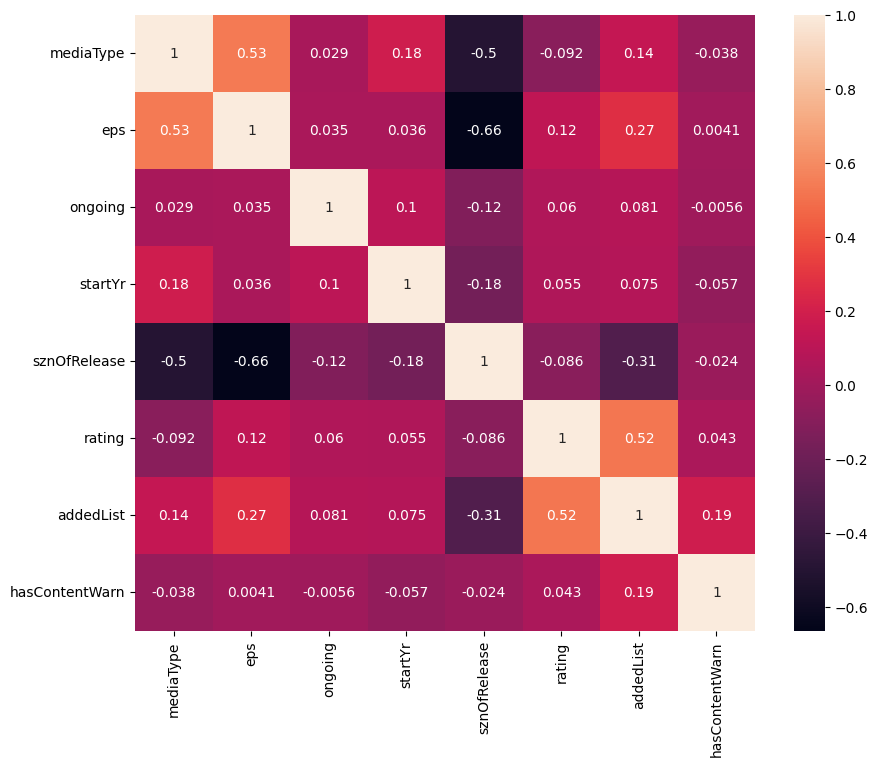

In [71]:
#Se puede observar que existe una correlacion entre el tipo de medio(mediaType) y eps(Episodios)
#Se puede observar que existe una correlacion entre el puntaje(rating) y las series agregadas a lista(addedList)
#Se puede observar que existe una correlacion entre el la cantidad de episodios(eps) y la series agregadas a listaa(addedList)
plt.figure(figsize=(10,8))
sns.heatmap(datos.corr(),annot=True)
plt.show()

#Evaluación

**1. Se busca conocer si existe una correlación entre el tipo de medio y el número de episodios de una serie.**

Resultado: Como se observa en el heat map, parece haber una correlación entre las dos variables, por lo cual hay ciertos tipos de medio que tienden a tener más episodios. Esto tiene sentido, puesto que medios como películas, OVA o especiales de TV o DVD tienden, en general, a tener uno o pocos episodios en comparación con el resto.

**2. Se busca conocer si existe una correlación entre el puntaje y la cantidad de usuarios que la tienen agregada a su lista.**

Resultado: Como se observa en el heat map, parece haber una correlación entre las dos variables, lo que se puede interpretar como que las series que suelen ser más populares y, por lo tanto, más personas las añaden a su lista, también suelen tener un mayor puntaje, independientemente de la categoría con la que sea marcada (vista, desea ver, abandonada o viendo).

**3. Se busca conocer si existe una correlación entre la cantidad de episodios que tiene una serie y la cantidad de usuarios que la tienen agregada a su lista.**

Resultado: Como se observa en el heat map, parece haber una correlación positiva entre las dos variables, por lo que parece que las series con mayor número de episodios tienden a tener mayor cantidad de usuarios que la agregan a su lista. Esto podría significar que las series más largas suelen generar mayor interés.

**4. Se busca conocer si existe una correlación entre la estación del año en el que fue emitida una serie y su puntaje.**

Resultado: Como se pudo observar en el grafico de caja anterior no parece haber una correlacion

**5. Se busca conocer si existe una correlacion entre el tipo de medio de una serie y su puntaje.**

Resultado: Como se pudo observar en el gráfico de caja anterior, hay ciertos tipos de medio que tienden a mostrar un mayor puntaje, por lo cual sí hay una correlación.

**6. Se busca conocer si existe una correlación entre si una serie es o no apta para todo público y su puntaje.**

Resultado: Como se pudo observar en el gráfico de caja, las series con contenido no apto para todo público tienden a tener ligeramente un mayor puntaje.

**7. Se busca conocer si existe una correlación entre el año de emisión de una serie y su puntaje.**

Resultado: Como se observa en el heatmap, no parece haber ninguna correlación entre ambas variables, por lo cual el año no es un factor en el puntaje que recibe una serie.

**8. Se busca conocer si la distribución de los episodios suele ser uniforme para todos los valores o tienden a concentrarse en ciertos intervalos determinados.**

Resultado: Como se pudo observar en la distribución de los episodios, estos tienden a concentrarse más en ciertos intervalos, lo cual es esperable, puesto que al momento de definir la cantidad de capítulos de una serie, los estudios tienden a definirlos en torno a los 12 o 25 capítulos. En el caso de películas y capítulos especiales, estos suelen tener entre 1 y 4 capítulos, lo cual se confirma con los resultados.

**9. Se busca conocer si la cantidad de series ha estado en aumento a medida que avanza el tiempo.**

Resultado: Como se observó gráficamente con anterioridad, la cantidad de series es mayor a medida que aumenta el año, por lo cual se confirma esta hipótesis.
